In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, Normalize, ToTensor

In [2]:
data_dir = "Data"

# I used torch.std_mean to find the values given to Normalize
mnist_xforms = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

# Load data files
train_data = MNIST(root=data_dir, train=True, download=True, transform=mnist_xforms)
valid_data = MNIST(root=data_dir, train=False, download=True, transform=mnist_xforms)

In [3]:
# Data loaders provide an easy interface for interactive with data
train_loader = DataLoader(train_data, batch_size=len(train_data))
valid_loader = DataLoader(valid_data, batch_size=len(valid_data))

In [4]:
# This odd bit of code forces the train loader to give us all inputs and targets
X_train, y_train = next(iter(train_loader))
X_valid, y_valid = next(iter(valid_loader))

In [5]:
print("Training input shape    :", X_train.shape)
print("Training target shape   :", y_train.shape)
print("Validation input shape  :", X_valid.shape)
print("Validation target shape :", y_valid.shape)

Training input shape    : torch.Size([60000, 1, 28, 28])
Training target shape   : torch.Size([60000])
Validation input shape  : torch.Size([10000, 1, 28, 28])
Validation target shape : torch.Size([10000])


In [6]:
digit_averages = {}
for digit in range(10):
    digit_averages[digit] = X_train[y_train==digit].mean(dim=0).squeeze()

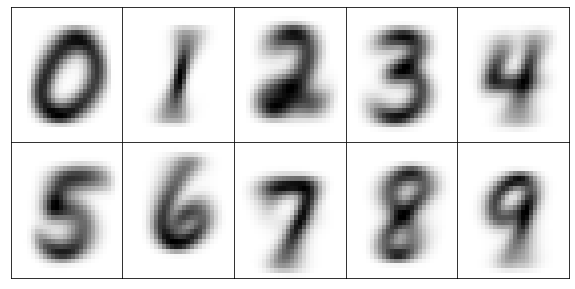

In [8]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
fig.subplots_adjust(wspace=0, hspace=0)

for digit, ax in zip(range(10), axes.flat):
    ax.imshow(digit_averages[digit], cmap='gray_r', aspect='auto')
    ax.set_xticks([])
    ax.set_yticks([])

fig.savefig('MNISTAverages.png')

In [ ]:
from math import inf
import torch

def get_most_similar(image, averages):
    closest_label = None
    closest_distance = inf
    for label in averages:
        distance = (image - averages[label]).abs().mean()
        if distance < closest_distance:
            closest_label = label
            closest_distance = distance
    return closest_label

num_correct = 0
for image, label in zip(X_valid, y_valid):
    num_correct += label== get_most_similar(image, digit_averages)

print(f"Percent guessed correctly: {num_correct/len(X_valid)*100:.2f}%")

Percent guessed correctly: 66.85%


In [ ]:
import torch
a = torch.randn(100)
b = torch.randn(100, 784)
c = a @ b
c.shape

torch.Size([784])

In [ ]:
a = torch.randn(5, 1)
a

tensor([[ 0.6586],
        [ 0.5106],
        [-0.5494],
        [-0.2956],
        [-0.5093]])

In [ ]:
b = torch.ones(1, 5)
b

tensor([[1., 1., 1., 1., 1.]])

In [ ]:
b.T @ a.T

tensor([[ 0.6586,  0.5106, -0.5494, -0.2956, -0.5093],
        [ 0.6586,  0.5106, -0.5494, -0.2956, -0.5093],
        [ 0.6586,  0.5106, -0.5494, -0.2956, -0.5093],
        [ 0.6586,  0.5106, -0.5494, -0.2956, -0.5093],
        [ 0.6586,  0.5106, -0.5494, -0.2956, -0.5093]])

In [ ]:
N, nl = 10, 4
b = torch.randn(nl, 1)
ONE = torch.ones(N, 1)
print(ONE @ b.T)

tensor([[-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210],
        [-0.3605,  0.0425,  0.9150, -0.3210]])
